In [1]:
import os
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from signal_analysis import *

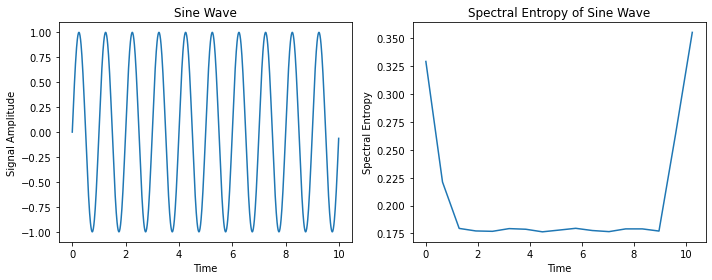

In [2]:
# Generate pure sine wave
fs = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs)  # Time array
f = 1  # Signal frequency
pure_sine_wave = np.sin(2 * np.pi * f * t)  # Pure sine wave signal

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, pure_sine_wave)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Sine Wave')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(pure_sine_wave, fs)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Sine Wave')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

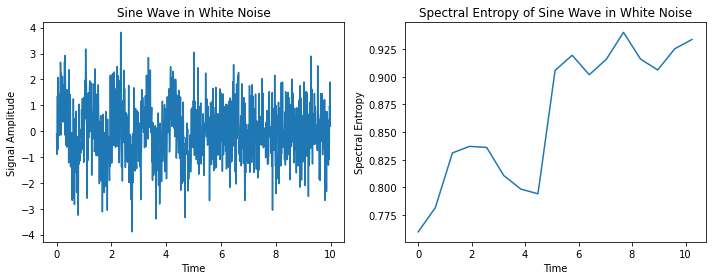

In [3]:
# Generate pure sine wave
fs = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs)  # Time array
f = 1  # Signal frequency

sine_wave = np.sin(2 * np.pi * f * t)  # Pure sine wave signal

mixed_noise = np.random.normal(0, 1, len(t))  # White noise signal
sine_wave = sine_wave + mixed_noise

mixed_noise[0:len(t)//2] = sine_wave[0:len(t)//2]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, mixed_noise)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Sine Wave in White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(mixed_noise, fs)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Sine Wave in White Noise')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

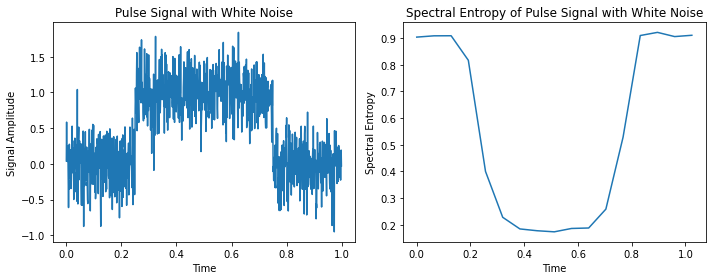

In [4]:
fs = 1000  # Sampling frequency
T = 1  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs)  # Time array

# Generate a pulse signal
f_pulse = 2  # Frequency of the pulse signal
pulse = np.zeros_like(t)
pulse[int(len(t)/4):int(3*len(t)/4)] = 1

# Mix the pulse signal with white noise
noise = np.random.normal(0, 0.3, len(t))  # White noise signal
mixed_signal = pulse + noise

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, mixed_signal)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Pulse Signal with White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(mixed_signal, fs)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Pulse Signal with White Noise')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

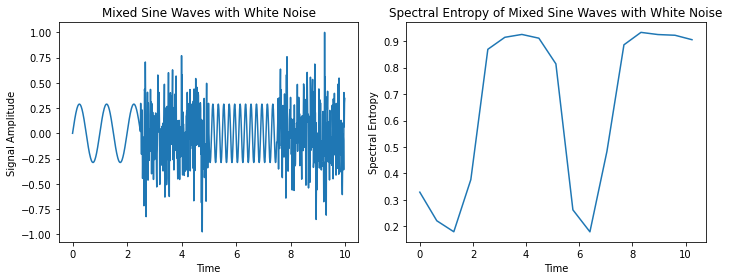

In [5]:
fs = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs)  # Time array

# Generate sine waves with different frequencies and durations
f1 = 1  # Frequency of the first sine wave
f2 = 5  # Frequency of the second sine wave
sine_wave_1 = np.sin(2 * np.pi * f1 * t[:int(len(t)/4)])  # First sine wave signal
sine_wave_2 = np.sin(2 * np.pi * f2 * t[int(len(t)/4):int(len(t)/2)])  # Second sine wave signal

# Generate white noise signals for two regions
white_noise_1 = np.random.normal(0, 1, len(t[int(len(t)/2):int(3*len(t)/4)]))  # White noise signal 1
white_noise_2 = np.random.normal(0, 1, len(t[int(3*len(t)/4):]))  # White noise signal 2

# Combine the signals to create the final intercalated signal
x = np.concatenate((sine_wave_1, white_noise_1, sine_wave_2, white_noise_2))

# Normalize the signal to have values between -1 and 1
x = x / np.max(np.abs(x))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, x)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Mixed Sine Waves with White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(x, fs)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Mixed Sine Waves with White Noise')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()